### Implement anomaly detection for given ECG dataset using Autoencoder and build the model by using the following steps:
        a. Import required libraries
        b. Upload / access the dataset
        c. Encoder converts it into latent representation
        d. Decoder networks convert it back to the original input
        e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

2022-11-15 18:24:35.594580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 18:24:35.796288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 18:24:35.796310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 18:24:35.828330: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 18:24:36.621727: W tensorflow/stream_executor/platform/de

In [2]:
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
#finding shape of the dataset
data.shape

(4998, 141)

In [4]:
#splitting training and testing dataset
features = data.drop(140, axis=1)
target = data[140]
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [5]:
#scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [9]:
#creating autoencoder subclass by extending Model class from keras
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
          Dense(64, activation='relu'),
          Dropout(0.1),
          Dense(32, activation='relu'),
          Dropout(0.1),
          Dense(16, activation='relu'),
          Dropout(0.1),
          Dense(ldim, activation='relu')
        ])
        self.decoder = Sequential([
          Dense(16, activation='relu'),
          Dropout(0.1),
          Dense(32, activation='relu'),
          Dropout(0.1),
          Dense(64, activation='relu'),
          Dropout(0.1),
          Dense(output_units, activation='sigmoid')
        ])
  
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [10]:
#model configuration
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
epochs = 20

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20


2022-11-15 18:25:44.504981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 18:25:44.505038: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 18:25:44.505076: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-kulkarni): /proc/driver/nvidia/version does not exist
2022-11-15 18:25:44.505449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5/5 [==============================] - 2s 76ms/step - loss: 0.0113 - mse: 0.0256 - val_loss: 0.0133 - val_mse: 0.0309
Epoch 2/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0108 - mse: 0.0245 - val_loss: 0.0129 - val_mse: 0.0300
Epoch 3/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0098 - mse: 0.0223 - val_loss: 0.0127 - val_mse: 0.0295
Epoch 4/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0088 - mse: 0.0198 - val_loss: 0.0121 - val_mse: 0.0281
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0077 - mse: 0.0173 - val_loss: 0.0115 - val_mse: 0.0267
Epoch 6/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0067 - mse: 0.0151 - val_loss: 0.0110 - val_mse: 0.0254
Epoch 7/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0060 - mse: 0.0135 - val_loss: 0.0105 - val_mse: 0.0243
Epoch 8/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0055 - mse: 0.0124 - val_loss: 0.01

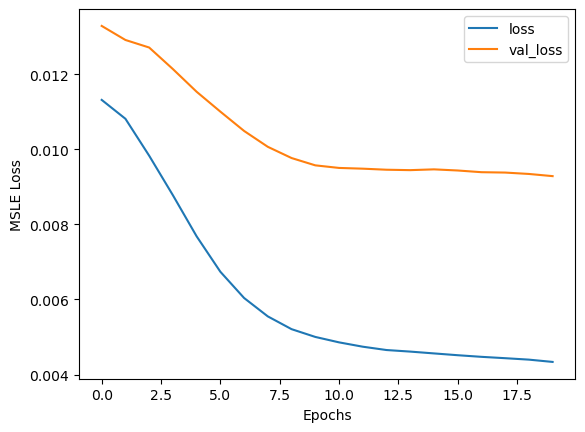

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [12]:
#finding threshold for anomaly and doing predictions
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    threshold = np.mean(reconstruction_errors.numpy()) \
    + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

73/73 [==============================] - 0s 2ms/step
Threshold: 0.009477851390879885


In [13]:
#getting accuracy score
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

32/32 [==============================] - 0s 1ms/step


0.942